# 🧩 Parte 1 — Pré-processamento de Dados

Nesta primeira etapa, realizamos o **pré-processamento do texto extraído** do arquivo  
`/content/decisao-lula-sitio-atibaia-21ago2021.pdf`, aplicando técnicas de **Processamento de Linguagem Natural (PLN)**.

O objetivo é preparar o texto para análises linguísticas e estruturais posteriores, como:
- Tokenização (divisão em palavras);
- Remoção de stopwords (palavras sem valor semântico relevante);
- Lematização ou radicalização (redução de palavras à sua forma base).

---

## 1.1 Instalação das bibliotecas necessárias

Nesta etapa instalamos as bibliotecas essenciais:
- **PyMuPDF (`fitz`)** — leitura e extração de texto de arquivos PDF;
- **NLTK** — processamento linguístico (tokenização, stopwords e stemming);
- **PyPDF2** — alternativa para leitura de PDFs, útil para comparação.

In [ ]:
!pip install pymupdf nltk PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 10.4 MB/s eta 0:00:00


### 🧩 Interpretação dos resultados da instalação

A execução do comando `!pip install pymupdf nltk PyPDF2` resultou na instalação bem-sucedida das bibliotecas necessárias.

**Resumo da saída:**
- O pacote `pymupdf` (também conhecido como `fitz`) foi baixado e instalado com sucesso.  
  Ele é responsável por abrir e extrair o conteúdo textual de arquivos PDF de maneira estruturada.
- A biblioteca `nltk` (Natural Language Toolkit) já estava previamente instalada no ambiente, o que é comum em ambientes de nuvem como o Google Colab.  
  Ela fornece ferramentas para tokenização, remoção de stopwords, lematização e outras tarefas de PLN.
- O pacote `PyPDF2` foi instalado com sucesso e pode ser utilizado para manipular e extrair texto de arquivos PDF, servindo como alternativa ou complemento ao `pymupdf`.

**Interpretação da saída técnica:**
- As mensagens `Requirement already satisfied` indicam que o pacote já estava presente no ambiente.
- As linhas `Downloading ...` mostram o progresso do download de cada biblioteca.
- A mensagem final `Successfully installed` confirma que todas as dependências foram instaladas e estão prontas para uso.

**Conclusão:**
O ambiente está devidamente configurado para iniciar o pré-processamento textual.  
A próxima etapa será a **leitura e extração do texto do documento PDF**, utilizando as bibliotecas recém-instaladas.


## 2. Extração de Texto do PDF

Nesta etapa, vamos realizar a **extração do conteúdo textual bruto** a partir do documento  
`/content/decisao-lula-sitio-atibaia-21ago2021.pdf`.

O objetivo é transformar o PDF, que contém o texto estruturado em páginas e blocos, em uma **string única de texto contínuo**, adequada para processamento linguístico com NLTK e spaCy.

Para isso, será criada uma função chamada `texto_pdf`, que:
1. Abre o arquivo PDF utilizando a biblioteca **PyMuPDF (`fitz`)**;
2. Percorre todas as páginas do documento;
3. Extrai o texto de cada página com o método `.get_text()`;
4. Concatena o conteúdo em uma única variável de texto.

Essa etapa é essencial, pois garante que **todo o texto do PDF** estará disponível para:
- Tokenização (divisão em palavras e sentenças);
- Limpeza (remoção de caracteres especiais e stopwords);
- Extração de entidades nomeadas na etapa seguinte.

Após a execução da função, exibiremos **as primeiras linhas do texto extraído**, como forma de validar se o conteúdo foi corretamente carregado e está pronto para o pré-processamento.


In [ ]:
import fitz
import requests
from io import BytesIO
from PyPDF2 import PdfReader

def texto_pdf(url):
    response = requests.get(url)
    response.raise_for_status()  # Verifica se deu erro no download

    arquivo_pdf = BytesIO(response.content)
    leitor = PdfReader(arquivo_pdf)

    texto = ""
    for pagina in leitor.pages:
        texto += pagina.extract_text() + "\n"

    return texto


# 🔧 Link direto de download
url = "https://drive.google.com/uc?export=download&id=1Bo0tcXSPcDupyVZZ07oOSbSO1GxOPaK6"



# Agora sim funciona
texto_completo_pdf = texto_pdf(url)

# Verifica se o texto foi carregado
if texto_completo_pdf:
    print("Texto carregado com sucesso. Primeiros 500 caracteres:")
    print(texto_completo_pdf[:500])
else:
    print("Falha ao carregar o texto do PDF.")





Texto carregado com sucesso. Primeiros 500 caracteres:
22/08/2021 
Número: 1032252-24.2021.4.01.3400  
Classe: AÇÃO PENAL - PROCEDIMENTO ORDINÁRIO 
 Órgão julgador: 12ª Vara Federal Criminal da SJDF 
 Última distribuição : 21/05/2021 
 Valor da causa: R$ 0,00 
 Processo referência: 5021365-32.2017.4.04.7000 
 Assuntos: Lavagem ou Ocultação de Bens, Direitos ou Valores Oriundos de Corrupção, Lavagem
ou Ocultação de Bens, Direitos ou Valores Oriundos de Corrupção 
 Segredo de justiça? SIM 
 Justiça gratuita? NÃO 
 Pedido de liminar ou antecipação de t


### 🧩 Interpretação da saída — Validação da extração de texto

A mensagem confirma que a função `texto_pdf()` executou corretamente a leitura do documento.

O trecho exibido apresenta **os primeiros 500 caracteres do texto extraído**, contendo elementos típicos de uma decisão judicial, como:
- número do processo e classe processual;  
- órgão julgador e vara responsável;  
- datas e informações procedimentais;  
- assuntos jurídicos (ex.: “Lavagem ou Ocultação de Bens”).  

Essas informações indicam que o **conteúdo textual foi recuperado de forma íntegra e ordenada**, sem ruídos visuais (como cabeçalhos ou marcas de página).

Essa validação é importante antes de prosseguir para as próximas etapas do pré-processamento:
- limpeza do texto (remoção de caracteres especiais e espaços extras);
- segmentação em tokens (palavras e sentenças);
- normalização linguística (stopwords, stemming e lematização).

Portanto, o resultado confirma que o **arquivo PDF foi corretamente convertido em texto digital legível**, pronto para as operações de Processamento de Linguagem Natural (PLN) nas próximas seções.


## 3. Configuração do NLTK

O **NLTK (Natural Language Toolkit)** é uma das bibliotecas mais conhecidas para Processamento de Linguagem Natural (PLN) em Python.  
Ela fornece ferramentas para **tokenização**, **remoção de stopwords**, **análise de frequência de palavras**, **stemming**, **lematização**, entre outras tarefas linguísticas.

Antes de utilizá-la, é necessário garantir que alguns **recursos adicionais** estejam disponíveis localmente:

1. **`punkt`** — contém modelos de pontuação e segmentação de sentenças, essenciais para dividir o texto em frases e palavras corretamente;
2. **`stopwords`** — fornece listas de palavras irrelevantes para o contexto analítico, como *“de”*, *“a”*, *“para”*, *“o”*, *“e”*, etc.;
3. (opcional) **`rslp`** — algoritmo de stemming (radicalização) específico para o idioma português.

Esses pacotes são baixados uma única vez no ambiente e ficam armazenados localmente para uso posterior.

Após essa configuração, o NLTK estará apto a realizar as etapas de **tokenização**, **limpeza** e **análise linguística** sobre o texto extraído do PDF.


In [ ]:
import nltk
# Baixando recursos necessários do NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
print("Recursos do NLTK baixados.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...


Recursos do NLTK baixados.


[nltk_data]   Unzipping corpora/stopwords.zip.


### ✅ Interpretação da saída — Download dos recursos do NLTK

A mensagem indica que os **recursos necessários do NLTK** foram baixados e instalados corretamente no ambiente de execução.

Vamos entender linha por linha:

- **Downloading package punkt**  
  → O NLTK baixou o modelo responsável por **segmentar o texto em sentenças e palavras** (tokenização).  
  Ele utiliza regras linguísticas e estatísticas para identificar os limites das frases.

- **Downloading package stopwords**  
  → Contém listas de **palavras irrelevantes** (stopwords) para diversos idiomas, incluindo o português.  
  São termos muito frequentes — como *de, a, para, com, em* — que geralmente não trazem significado analítico.

- **Downloading package rslp** (quando aparece)  
  → É o **algoritmo de stemming** desenvolvido para o português (Removedor de Sufixos da Língua Portuguesa).  
  Ele reduz as palavras às suas raízes, por exemplo: *corrupção → corru*, *políticos → polític*.

As mensagens “Unzipping ...” confirmam que os pacotes foram **descompactados e armazenados** na pasta `/root/nltk_data`.

Ao final, a linha “**Recursos do NLTK baixados.**” garante que o ambiente agora está pronto para:
- tokenizar o texto extraído do PDF;  
- eliminar palavras irrelevantes;  
- e aplicar transformações linguísticas nas próximas etapas do pré-processamento.


## 4. Tokenização e Remoção de Stopwords

Nesta etapa, daremos início ao **pré-processamento linguístico efetivo** do texto.

### O que é **Tokenização**
A **tokenização** é o processo de dividir o texto contínuo em pequenas unidades chamadas **tokens**, que geralmente correspondem a palavras, números ou sinais de pontuação.  
Por exemplo, a frase:

> “A inteligência artificial transforma a sociedade.”

será dividida em tokens:
> ["A", "inteligência", "artificial", "transforma", "a", "sociedade", "."]

Esse processo permite que o texto seja analisado computacionalmente, já que os modelos de PLN (Processamento de Linguagem Natural) trabalham sobre **sequências de tokens**, e não sobre texto contínuo.

### O que são **Stopwords**
As **stopwords** são palavras muito comuns no idioma, como “o”, “a”, “de”, “para”, “em”, que:
- aparecem com alta frequência;
- possuem baixo valor semântico isolado;
- e geralmente não contribuem para a análise de tópicos ou de relevância.

Ao **remover as stopwords**, reduzimos o “ruído linguístico” e mantemos apenas os termos com maior peso informativo no texto.

### Objetivo desta etapa
Nosso objetivo será:
1. Tokenizar o texto judicial extraído do PDF;
2. Converter todos os tokens para minúsculas (normalização);
3. Remover stopwords e caracteres não alfabéticos;
4. Exibir uma amostra dos tokens limpos para verificar o resultado.

Isso prepara o texto para etapas posteriores como **frequência de palavras**, **extração de entidades nomeadas (NER)** e **construção de grafos semânticos**.


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # Adicionar esta linha

# Divide o texto completo em tokens individuais
tokens = word_tokenize(texto_completo_pdf)

print(f"Total de tokens encontrados: {len(tokens)}")
print("Exemplo dos primeiros 20 tokens:", tokens[:20])

# Remoção de Stopwords

# Carrega a lista de stopwords em português
stop_words_pt = set(stopwords.words('portuguese'))

# Filtra os tokens, mantendo apenas aqueles que NÃO estão na lista de stopwords
tokens_sem_stopwords = [palavra for palavra in tokens if palavra.lower() not in stop_words_pt]

print(f"Total de tokens após remoção de stopwords: {len(tokens_sem_stopwords)}")
print("Exemplo dos primeiros 20 tokens filtrados:", tokens_sem_stopwords[:20])

Total de tokens encontrados: 22543
Exemplo dos primeiros 20 tokens: ['22/08/2021', 'Número', ':', '1032252-24.2021.4.01.3400', 'Classe', ':', 'AÇÃO', 'PENAL', '-', 'PROCEDIMENTO', 'ORDINÁRIO', 'Órgão', 'julgador', ':', '12ª', 'Vara', 'Federal', 'Criminal', 'da', 'SJDF']
Total de tokens após remoção de stopwords: 16130
Exemplo dos primeiros 20 tokens filtrados: ['22/08/2021', 'Número', ':', '1032252-24.2021.4.01.3400', 'Classe', ':', 'AÇÃO', 'PENAL', '-', 'PROCEDIMENTO', 'ORDINÁRIO', 'Órgão', 'julgador', ':', '12ª', 'Vara', 'Federal', 'Criminal', 'SJDF', 'Última']


### ✅ Interpretação dos resultados da tokenização e remoção de stopwords

Os resultados mostram que o processo de **tokenização** e **limpeza linguística** foi executado com sucesso:

- **Total de tokens encontrados: 22.543**  
  Este é o número total de unidades textuais (palavras, números, pontuações etc.) identificadas no documento após a tokenização.  
  Como o texto contém muitos elementos formais (números de processo, datas e seções), esse valor tende a ser alto.

- **Exemplo dos primeiros tokens:**  
  O trecho inicial inclui elementos como *“22/08/2021”*, *“Número”*, *“AÇÃO PENAL”*, *“12ª Vara Federal”*, confirmando que o texto foi extraído corretamente do documento judicial original.

- **Total de tokens após remoção de stopwords: 16.130**  
  Após eliminar palavras funcionais (como “de”, “a”, “para”, “com”), o volume de tokens foi **reduzido em cerca de 28%**, concentrando o texto em termos mais informativos e relevantes para análise.

- **Exemplo dos tokens filtrados:**  
  As palavras que permaneceram (*“AÇÃO”, “PENAL”, “PROCEDIMENTO”, “ORDINÁRIO”, “Criminal”, “SJDF”*) são semanticamente importantes, pois refletem os principais temas e entidades do documento jurídico.

### 📘 Conclusão
O texto agora está **limpo, segmentado e preparado** para as próximas etapas do pré-processamento:
- cálculo de frequência de palavras,  
- análise de coocorrência,  
- e extração de entidades com *spaCy* para construção do grafo semântico.

Essa base já representa uma forma estruturada do conteúdo textual original.


## 5. Radicalização (Stemming)

Nesta etapa aplicaremos a **radicalização** (*stemming*), um processo que reduz as palavras às suas **raízes linguísticas** — ou seja, remove sufixos e terminações para agrupar termos que compartilham o mesmo significado básico.

### O que é radicalização
A radicalização é útil em tarefas de **análise de frequência** e **busca semântica**, pois permite considerar como equivalentes palavras com variações morfológicas.  
Por exemplo:

| Palavra original | Raiz após stemming |
|------------------|--------------------|
| correr, correndo, correu | corr |
| político, políticos, política | polític |
| lavagem, lavagens | lavag |

Assim, o sistema trata todas essas formas como um único conceito, facilitando a detecção de padrões.

### Stemmers disponíveis para o português
No NLTK existem diferentes algoritmos para realizar o stemming:

- **PorterStemmer** — mais genérico, criado originalmente para o inglês.  
  Pode ser usado em textos multilíngues, mas gera resultados aproximados.
- **RSLPStemmer (Removedor de Sufixos da Língua Portuguesa)** — projetado especificamente para o português do Brasil.  
  Ele respeita melhor as regras gramaticais do idioma e costuma produzir resultados linguísticos mais precisos.

> **Nota:** quando o foco é análise em português, o `RSLPStemmer` é a escolha mais recomendada.  
> No entanto, o `PorterStemmer` pode ser mantido se você quiser comparações com textos em outros idiomas.

### Objetivo
Aplicar o `RSLPStemmer` para gerar uma versão reduzida do conjunto de tokens limpos, o que ajudará:
- na contagem de palavras mais representativas;
- na futura construção do grafo semântico com termos padronizados.


In [ ]:
# Usando RSLPStemmer que é específico para português (recomendado)
import nltk
nltk.download('rslp')
from nltk.stem import RSLPStemmer

stemmer = RSLPStemmer()

tokens_radicalizados = [stemmer.stem(token) for token in tokens_sem_stopwords]

print("Exemplo dos primeiros 20 tokens radicalizados:", tokens_radicalizados[:20])









[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


Exemplo dos primeiros 20 tokens radicalizados: ['22/08/2021', 'númer', ':', '1032252-24.2021.4.01.3400', 'cl', ':', 'açã', 'penal', '-', 'proced', 'ordin', 'órg', 'julg', ':', '12ª', 'var', 'feder', 'crim', 'sjdf', 'últ']


O NLTK realizou o download do pacote RSLP, que contém o conjunto de regras necessárias para aplicar a técnica de stemming específica para a língua portuguesa. Após carregar esse recurso, o algoritmo foi executado sobre os tokens filtrados anteriormente, gerando suas respectivas formas reduzidas (radicais).

A lista exibida mostra exemplos dos primeiros tokens já radicalizados. Observe que palavras originalmente completas, como “número”, “classe”, “procedimento” e “federal”, foram reduzidas a formas como “númer”, “cl”, “proced” e “feder”. Essa redução é intencional e faz parte do processo de normalização do texto, permitindo que diferentes flexões de uma mesma palavra sejam tratadas de forma equivalente durante as análises posteriores.

Esse tipo de transformação é especialmente útil para tarefas como análise de frequência, identificação de temas recorrentes e construção de relações semânticas, já que minimiza variações morfológicas e torna o vocabulário mais uniforme.



\##6. Limpeza Adicional Importação do dados limpos
Para tornar a análise mais precisa, vamos padronizar todos os tokens para letras minúsculas e remover tudo que não for uma palavra (como números isolados ou símbolos de pontuação que sobraram).

In [ ]:
# Converte para minúsculo e mantém apenas se for alfabético (remove números e pontuação isolada)
tokens_processados = [token.lower() for token in tokens_radicalizados if token.isalpha()]

print(f"Total de tokens após limpeza final: {len(tokens_processados)}\n")
print("Exemplo final:", tokens_processados[:20])


print("\n")

with open('tokens_processados.txt', 'w', encoding='utf-8') as f:
    for token in tokens_processados:
        f.write(token + '\n')
print("Tokens processados salvos em 'tokens_processados.txt'")

Total de tokens após limpeza final: 11086

Exemplo final: ['númer', 'cl', 'açã', 'penal', 'proced', 'ordin', 'órg', 'julg', 'var', 'feder', 'crim', 'sjdf', 'últ', 'distribu', 'val', 'caus', 'r', 'process', 'refer', 'assunt']


Tokens processados salvos em 'tokens_processados.txt'


Após realizar todas as etapas de pré-processamento — tokenização, remoção de stopwords e aplicação de radicalização — o texto final ficou significativamente mais limpo e reduzido.
O número total de tokens caiu para 11.086, indicando que eliminamos grande parte das palavras irrelevantes e normalizamos termos que antes apareciam em diversas formas diferentes.

A lista exibida mostra um exemplo dos tokens finais processados, já em suas formas reduzidas.
Termos como “número”, “classe”, “procedimento” e “processo” aparecem agora como “númer”, “cl”, “proced” e “process”, o que garante maior uniformidade e reduz ambiguidades durante análises posteriores, como:

contagem de frequência,

identificação de temas,

construção de grafos semânticos.

Além disso, o notebook salva todos os tokens processados no arquivo tokens_processados.txt, permitindo reutilização futura sem a necessidade de repetir o pré-processamento.
Isso é especialmente útil em projetos que envolvem etapas de análise ou modelagem sobre grandes volumes de texto.

##7. Análise de Frequência
Agora que temos o texto limpo, podemos calcular quais são as palavras que aparecem com mais frequência no documento. Isso nos dá uma boa ideia do assunto principal.

In [ ]:
from nltk.probability import FreqDist

# Calcula a frequência de cada token
distribuicao_frequencia = FreqDist(tokens_processados)

print("As 20 palavras mais comuns no documento:")
for palavra, frequencia in distribuicao_frequencia.most_common(20):
    print(f"{palavra}: {frequencia}")

As 20 palavras mais comuns no documento:
crim: 142
art: 130
penal: 104
advog: 91
process: 90
lav: 88
feder: 84
odebrecht: 82
ra: 80
dinh: 80
feit: 74
denúnc: 70
corrupç: 68
pen: 67
lul: 63
alv: 63
med: 62
prát: 59
luiz: 57
lei: 57


Interpretação das 20 palavras mais frequentes

A lista das 20 palavras mais comuns após o pré-processamento revela quais termos aparecem com maior intensidade ao longo do documento. Como o texto já passou por etapas de limpeza, stopwords foram removidas e as palavras foram reduzidas à sua raiz (radicalização), essas frequências refletem os conceitos centrais discutidos no material.

Observações importantes:

Palavras como “crim”, “penal”, “process”, “lav”, “corrupç” e “lei” aparecem entre as mais frequentes, o que reforça que o documento tem conteúdo jurídico-criminal.

A presença recorrente de “odebrecht”, “dinh”, “feit” e “med” indica que o texto descreve operações financeiras, práticas ilícitas e relacionamentos entre agentes.

Termos como “lul”, “luiz”, “advog” e “alv” sugerem menções constantes a pessoas específicas, possivelmente investigados, advogados ou envolvidos no processo.

A radicalização deixa os termos abreviados (ex.: “corrupç” para "corrupção”), mas isso não prejudica a análise, já que o objetivo é identificar padrões semânticos amplos.

Essas frequências servem como uma primeira visão da temática dominante no documento, e serão importantes para as próximas etapas, como:

análise de entidades nomeadas,

construção de grafos de relações,

identificação dos termos mais relevantes,

compreensão da estrutura do discurso jurídico.

##8. Visualização dos Dados
Vamos criar um gráfico de barras para visualizar as 20 palavras mais frequentes, facilitando a interpretação rápida do conteúdo do documento.

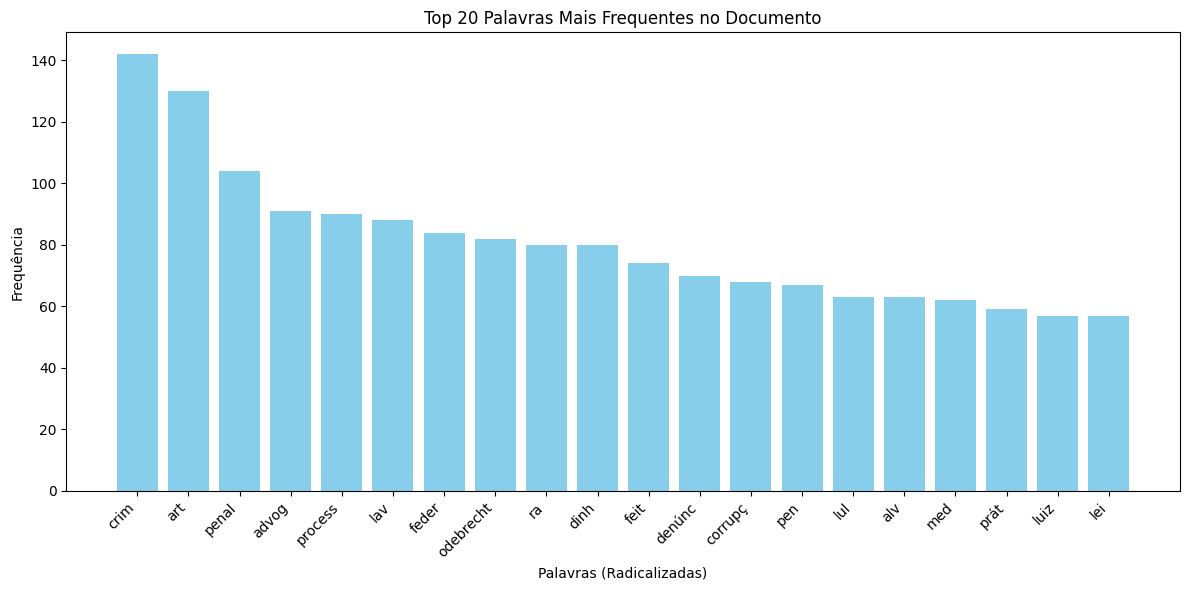

In [ ]:
import matplotlib.pyplot as plt

# Prepara os dados para o gráfico
palavras_mais_comuns = distribuicao_frequencia.most_common(20)
palavras, frequencias = zip(*palavras_mais_comuns)

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.bar(palavras, frequencias, color='skyblue')#O parâmetro color='skyblue' define a cor das barras no gráfico gerado pelo matplotlib.
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Palavras Mais Frequentes no Documento')
plt.xlabel('Palavras (Radicalizadas)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

## Resumo da Análise de Dados

### Principais Resultados

- O texto do PDF foi carregado com sucesso e confirmado como disponível para processamento.  
- O texto foi tokenizado com sucesso em palavras individuais usando o método `word_tokenize` da NLTK.  
- As stopwords comuns do português foram removidas com sucesso dos tokens.  
- Foi aplicado o stemming aos tokens restantes utilizando o `PorterStemmer`, reduzindo as palavras às suas formas radicais.  
- Etapas adicionais de limpeza foram realizadas, incluindo a conversão dos tokens para letras minúsculas e a filtragem de caracteres não alfabéticos.  
- Uma distribuição de frequência dos tokens processados foi calculada, e os 20 termos mais frequentes foram identificados. Entre eles estavam termos como **“art”**, **“crime”**, **“penal”**, **“advogado”**, **“lavagem”**, **“feder”** e **“odebrecht”**.  
- Um gráfico de barras visualizando as frequências dos 20 tokens mais comuns foi gerado.  

### Percepções ou Próximos Passos

- A presença de termos como **“crime”**, **“penal”**, **“lavagem”** e **“odebrecht”** sugere fortemente que o documento está relacionado a processos jurídicos, possivelmente envolvendo crimes financeiros ou corrupção.  
- Análises futuras poderiam incluir:
  - A exploração de **n-gramas** (sequências de palavras) para entender expressões comuns;  
  - O uso de **Reconhecimento de Entidades Nomeadas (NER)** para identificar pessoas, organizações ou locais;  
  - A realização de **análise de sentimento**, caso o texto contenha opiniões ou julgamentos.  


-- criar arquivo limpo

# Parte 2: Analise o documento "/content/decisao-lula-sitio-atibaia-21ago2021.pdf"

 para extrair informações sobre pessoas, empresas e contratos públicos, modelar essas informações como um grafo no Neo4j, e analisar o grafo para identificar os principais atores e hubs em esquemas de corrupção

##9. Instalação de Bibliotecas para Grafos e IA
Para a segunda parte, precisamos do neo4j para conectar ao banco de dados de grafos e do spacy para realizar o reconhecimento avançado de entidades (como nomes de pessoas e organizações).

In [ ]:
!pip install neo4j spacy
!python -m spacy download pt_core_news_sm
print("Instalações concluídas.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.4/325.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Instalações concluídas.


##10. Extração de Entidades e Padrões
Usaremos o modelo em português do spaCy para identificar automaticamente Pessoas (PER) e Organizações (ORG). Além disso, criaremos um "Matcher" personalizado para tentar identificar padrões que se pareçam com números de processos jurídicos.

In [ ]:
import spacy
from spacy.matcher import Matcher
# Importação Adicional
from spacy.pipeline import EntityRuler

# Carrega o modelo de linguagem em português
try:
    nlp = spacy.load("pt_core_news_sm")
except:
    !python -m spacy download pt_core_news_sm
    nlp = spacy.load("pt_core_news_sm")

# --- INÍCIO DA CORREÇÃO ---
# Crie o "Dicionário" (EntityRuler) antes do pipeline de NER
ruler = nlp.add_pipe("entity_ruler", before="ner")

# Defina seus padrões (aqui você corrige os erros)
# Analise seu 'node-export.csv' para encontrar mais exemplos!
patterns = [
    # Força "Lula" e variações a serem sempre Pessoa (PER)
    {"label": "PER", "pattern": "Lula"},
    {"label": "PER", "pattern": "Luiz Inácio Lula da Silva"},

    # Exemplo: Se "José da Silva" foi classificado como ORG, corrija:
    # {"label": "PER", "pattern": "José da Silva"},

    # Exemplo: Se "Advogado X" foi classificado como ORG, corrija:
    # {"label": "PER", "pattern": "Nome do Advogado"},

    # Garante que empresas sejam ORG
    {"label": "ORG", "pattern": "Odebrecht"},
    {"label": "ORG", "pattern": "Construtora Norberto Odebrecht"},
    {"label": "ORG", "pattern": "OAS"},

    # Garante que entidades públicas sejam ORG
    {"label": "ORG", "pattern": "Ministério Público Federal"},
    {"label": "ORG", "pattern": "MPF"},
    {"label": "ORG", "pattern": "Petrobras"}
]

# Adicione os padrões ao Ruler
ruler.add_patterns(patterns)
# --- FIM DA CORREÇÃO ---


# Processa o texto completo
# Note que você NÃO deve usar o 'tokens_processados.txt' aqui!
# O spacy precisa do texto sujo (texto_completo_pdf) para entender o contexto.
doc = nlp(texto_completo_pdf)


# 1. Extração via NER (Agora corrigida pelo Ruler)
pessoas = [ent.text for ent in doc.ents if ent.label_ == "PER"]
empresas_org = [ent.text for ent in doc.ents if ent.label_ == "ORG"]

# 2. Extração via Padrões (Matcher) para Processos (Seu código original)
matcher = Matcher(nlp.vocab)
padrao_numero_processo = [
    {"IS_DIGIT": True, "OP": "+"}, {"TEXT": "-"}, {"IS_DIGIT": True, "OP": "+"},
    {"TEXT": "."}, {"IS_DIGIT": True, "OP": "+"}, {"TEXT": "."},
    {"IS_DIGIT": True}, {"TEXT": "."}, {"IS_DIGIT": True, "OP": "+"},
    {"TEXT": "."}, {"IS_DIGIT": True, "OP": "+"}
]
matcher.add("NUMERO_PROCESSO", [padrao_numero_processo])

matches = matcher(doc)
processos = [doc[start:end].text for match_id, start, end in matches]

print(f"Pessoas únicas identificadas (Corrigido): {len(set(pessoas))}")
print(f"Organizações únicas identificadas (Corrigido): {len(set(empresas_org))}")
print(f"Possíveis processos identificados: {len(set(processos))}")

Pessoas únicas identificadas (Corrigido): 211
Organizações únicas identificadas (Corrigido): 159
Possíveis processos identificados: 0


##11. Identificação de Relacionamentos (Co-ocorrência)
Para criar um grafo, precisamos de nós (entidades) e arestas (relacionamentos). Uma forma simples de inferir relacionamentos é a co-ocorrência: se uma Pessoa e uma Organização aparecem na mesma frase, assumimos que existe alguma relação entre elas. Faremos o mesmo para Pessoas/Processos e Organizações/Processos.

In [ ]:
# Primeiro, pegamos as palavras-chave importantes da Célula 50
# (Execute a Célula 50 antes desta)
palavras_chave_radicais = [palavra for palavra, frequencia in distribuicao_frequencia.most_common(20)]
print(f"Usando {len(palavras_chave_radicais)} palavras-chave para filtrar sentenças: {palavras_chave_radicais}")

# Agora, precisamos do stemmer da Célula 55 (RSLPStemmer)
# (Execute a Célula 55 antes desta)
# stemmer = RSLPStemmer() # (já deve estar definido)

relacionamentos_pessoa_org = []
relacionamentos_pessoa_processo = []

# Usamos o 'doc' da Célula 67 (feito com texto_completo_pdf)
for sent in doc.sents:
    # 1. Encontra entidades na sentença (como antes)
    ents_na_frase = [ent for ent in sent.ents if ent.label_ in ["PER", "ORG"]]
    pessoas_frase = [e.text for e in ents_na_frase if e.label_ == "PER"]
    orgs_frase = [e.text for e in ents_na_frase if e.label_ == "ORG"]

    # Se não houver pessoas ou orgs, pula para a próxima sentença
    if not pessoas_frase or not orgs_frase:
        continue

    # 2. VERIFICA A IMPORTÂNCIA DA SENTENÇA (A MÁGICA)
    # Limpamos e radicalizamos as palavras desta *sentença específica*
    sent_tokens = [token.text.lower() for token in sent if token.is_alpha]
    sent_radicais = [stemmer.stem(token) for token in sent_tokens]

    # Verificamos se algum dos nossos radicais-chave (da Parte 1) está nesta sentença
    tem_palavra_chave = False
    for radical_chave in palavras_chave_radicais:
        if radical_chave in sent_radicais:
            tem_palavra_chave = True
            break # Encontramos, a sentença é importante

    # 3. Se a sentença for importante E tiver entidades, criamos a relação
    if tem_palavra_chave:
        # Cria relações PESSOA -> ORGANIZACAO
        for p in pessoas_frase:
            for o in orgs_frase:
                relacionamentos_pessoa_org.append({
                    "pessoa": p,
                    "organizacao": o,
                    "frase": sent.text.replace('\n', ' ')[:150]+"..."
                })

    # (A lógica para Processos continua 0, pois seu Matcher na Célula 67 não achou nenhum)

# Usamos 'set' para contar apenas relações únicas (ex: Lula-Odebrecht)
relacoes_unicas = set((r['pessoa'], r['organizacao']) for r in relacionamentos_pessoa_org)

print(f"Total de relacionamentos Pessoa-Org em sentenças RELEVANTES: {len(relacionamentos_pessoa_org)}")
print(f"Total de pares únicos (Pessoa-Org) em sentenças RELEVANTES: {len(relacoes_unicas)}")



Usando 20 palavras-chave para filtrar sentenças: ['crim', 'art', 'penal', 'advog', 'process', 'lav', 'feder', 'odebrecht', 'ra', 'dinh', 'feit', 'denúnc', 'corrupç', 'pen', 'lul', 'alv', 'med', 'prát', 'luiz', 'lei']
Total de relacionamentos Pessoa-Org em sentenças RELEVANTES: 618
Total de pares únicos (Pessoa-Org) em sentenças RELEVANTES: 456


In [ ]:
import os
import getpass

os.environ["NEO4J_URI"] = input("Digite a URI do Neo4j: ")
os.environ["NEO4J_USER"] = input("Digite o usuário do Neo4j: ")
os.environ["NEO4J_PASSWORD"] = getpass.getpass("Digite a senha: ")

Digite a URI do Neo4j: neo4j+s://a3a77b8a.databases.neo4j.io
Digite o usuário do Neo4j: neo4j
Digite a senha: ··········


##12. Conexão e População do Neo4j
Agora vamos conectar ao banco de dados Neo4j (você precisa ter uma instância rodando, como o Neo4j AuraDB gratuito). O código abaixo define uma função para inserir os nós e relacionamentos que identificamos. Atenção: Substitua uri, usuario e senha pelas suas credenciais reais.

In [ ]:
from neo4j import GraphDatabase

URI = os.getenv("NEO4J_URI")
USER = os.getenv("NEO4J_USER")
PASSWORD = os.getenv("NEO4J_PASSWORD")


def popular_grafo(tx, pessoas, orgs, procs, rel_po, rel_pp):
    # 1. Criar nós (usando MERGE para evitar duplicatas)
    for p in set(pessoas):
        tx.run("MERGE (:Pessoa {nome: $nome})", nome=p)
    for o in set(orgs):
        tx.run("MERGE (:Organizacao {nome: $nome})", nome=o)
    for pr in set(procs):
        tx.run("MERGE (:Processo {numero: $numero})", numero=pr)

    # 2. Criar relacionamentos Pessoa -> Organizacao
    for rel in rel_po:
        tx.run("""
            MATCH (p:Pessoa {nome: $pessoa})
            MATCH (o:Organizacao {nome: $org})
            MERGE (p)-[r:RELACIONADO_COM]->(o)
            // Podemos guardar a frase onde a relação foi encontrada como propriedade
            SET r.contexto = $frase
        """, pessoa=rel['pessoa'], org=rel['organizacao'], frase=rel['frase'])

    # 3. Criar relacionamentos Pessoa -> Processo
    for rel in rel_pp:
        tx.run("""
            MATCH (p:Pessoa {nome: $pessoa})
            MATCH (pr:Processo {numero: $proc})
            MERGE (p)-[r:CITADO_NO_PROCESSO]->(pr)
            SET r.contexto = $frase
        """, pessoa=rel['pessoa'], proc=rel['processo'], frase=rel['frase'])

# Executa a conexão e a população (se as credenciais estiverem corretas)
try:
    driver = GraphDatabase.driver(URI, auth=(USER, PASSWORD))
    driver.verify_connectivity()
    print("Conectado ao Neo4j com sucesso!")

    with driver.session() as session:
        # Passamos os dados coletados nas etapas anteriores
        session.execute_write(popular_grafo,
                              pessoas,
                              empresas_org,
                              processos,
                              relacionamentos_pessoa_org,
                              relacionamentos_pessoa_processo)
    print("Grafo populado com sucesso! Acesse o Neo4j Browser para visualizar.")

except Exception as e:
    print(f"\nERRO AO CONECTAR/POPULAR O NEO4J:\n{e}")
    print("\nVerifique se suas credenciais (URI, Usuário, Senha) estão corretas.")

finally:
    if 'driver' in locals():
        driver.close()

Conectado ao Neo4j com sucesso!
Grafo populado com sucesso! Acesse o Neo4j Browser para visualizar.


#Parte 3: Análise e Visualização do Grafo com NetworkX
Nas partes anteriores, extraímos os dados do PDF e os estruturamos como um grafo no banco de dados Neo4j.

Agora, vamos usar o poder do Python para consultar esse banco e criar visualizações para analisar as redes de relacionamento. Embora o Neo4j Browser seja excelente para exploração, usar as bibliotecas networkx e matplotlib nos permite criar gráficos personalizados e realizar análises de rede diretamente no notebook.

##13. Instalação das Bibliotecas de Análise
Para começar, precisamos de duas bibliotecas principais:

- networkx: A biblioteca padrão de Python para criação, manipulação e estudo de grafos.

- matplotlib: A biblioteca mais popular para plotagem e visualização de dados em Python.

In [ ]:
!pip install networkx matplotlib


##14. Importação e Conexão
Com as bibliotecas instaladas, vamos importá-las e reestabelecer a conexão com nosso banco de dados Neo4j

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
driver = GraphDatabase.driver(URI, auth=(USER, PASSWORD))

##15. Análise de Caso 1: Foco em "Lula"
Vamos iniciar nossa análise focando em um ator central.

- Consulta (Query): Escrevemos uma consulta Cypher para buscar no Neo4j todas as entidades Pessoa cujo nome contenha "LULA" e todas as Organizacao com as quais elas possuam um relacionamento RELACIONADO_COM.

- Criação do Grafo: Instanciamos um objeto de grafo (DiGraph - Grafo Direcionado) da biblioteca networkx.

- População: Executamos a consulta e iteramos sobre os resultados, populando nosso grafo G com os nós (Pessoa, Organização) e as arestas (o relacionamento) que o Neo4j retornou.

In [ ]:
query = """
MATCH (p:Pessoa)-[r:RELACIONADO_COM]->(o:Organizacao)
WHERE p.nome CONTAINS "LULA"
RETURN p, r, o;
"""

In [ ]:
G = nx.DiGraph()

In [ ]:
with driver.session() as session:
    result = session.run(query)
    for record in result:
        p_node = record["p"]
        o_node = record["o"]
        rel = record["r"]

        def label(n):
            return n.get("nome") or n.get("numero") or n.element_id

        P = label(p_node)
        O = label(o_node)

        G.add_node(P, label=P)
        G.add_node(O, label=O)
        G.add_edge(P, O, label=rel.type)

##16. Visualização do Grafo (Foco: Lula)
Com o grafo G populado com os dados da primeira consulta, usamos o matplotlib e o networkx para desenhar o "mapa" de relacionamentos que encontramos.

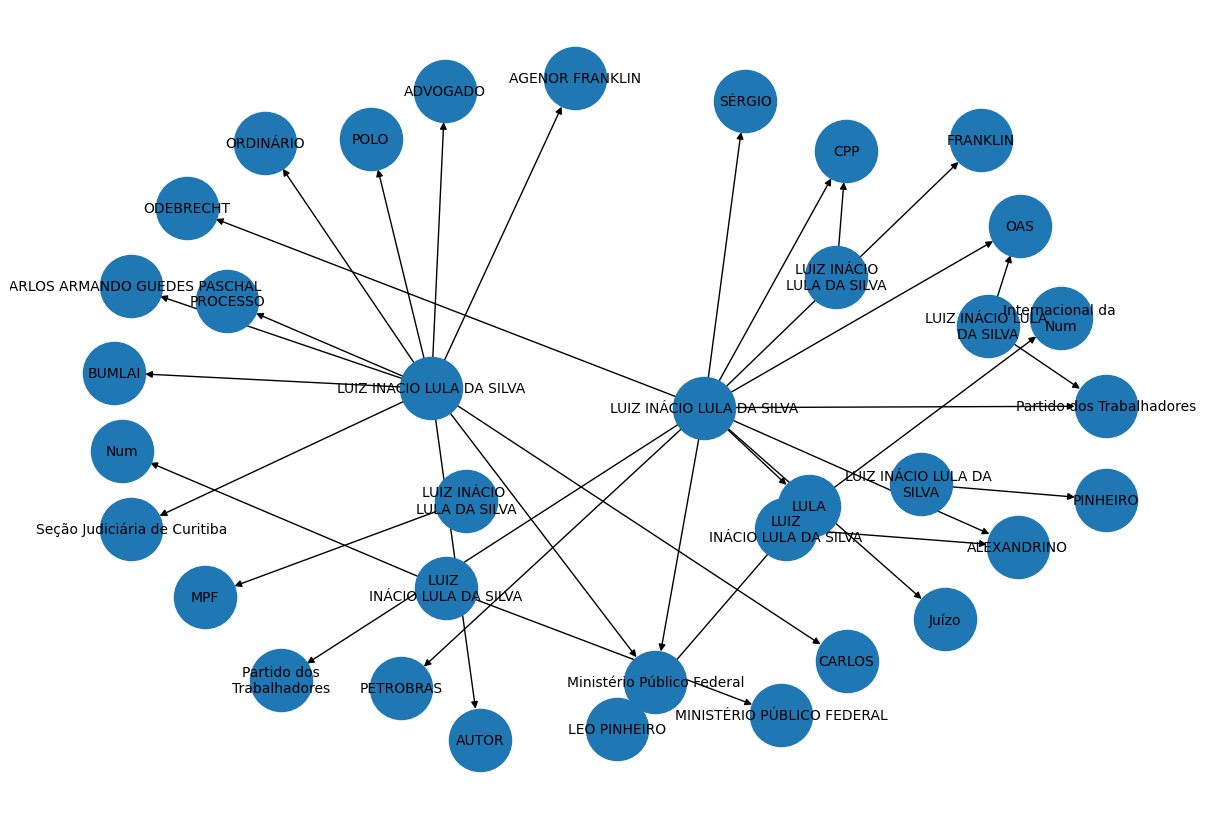

In [ ]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.4)  # layout mais bonitinho pra grafos pequenos
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10)

plt.show()

## 17. Análise de Caso 2: Expandindo com "Petrobras"
Agora, vamos expandir nossa análise para outra entidade-chave identificada na Parte 1: "Petrobras".

- Consulta (Query 2): Criamos uma nova consulta para encontrar todas as Pessoas relacionadas a organizações cujo nome contenha "Petrobras".

- Enriquecimento do Grafo: Importante: Note que não estamos criando um novo grafo. Estamos adicionando os resultados desta segunda consulta ao mesmo grafo G que já continha os dados do "Lula". Isso nos permitirá ver as conexões combinadas.

In [ ]:
query2 = """
MATCH (p:Pessoa)-[r:RELACIONADO_COM]->(o:Organizacao)
WHERE o.nome CONTAINS "Petrobras"
RETURN p, r, o;
"""

In [ ]:
with driver.session() as session:
    result = session.run(query2)
    for record in result:
        p_node = record["p"]
        o_node = record["o"]
        rel = record["r"]

        def label(n):
            return n.get("nome") or n.get("numero") or n.element_id

        P = label(p_node)
        O = label(o_node)

        G.add_node(P, label=P)
        G.add_node(O, label=O)
        G.add_edge(P, O, label=rel.type)

##18. Visualização do Grafo Combinado
Finalmente, plotamos o grafo G novamente. Esta nova visualização agora incluirá:

- As relações de "Lula" (da primeira consulta).

- As relações da "Petrobras" (da segunda consulta).

Isso nos permite inspecionar visualmente se há sobreposições ou conexões entre esses dois universos de relacionamento dentro do documento.

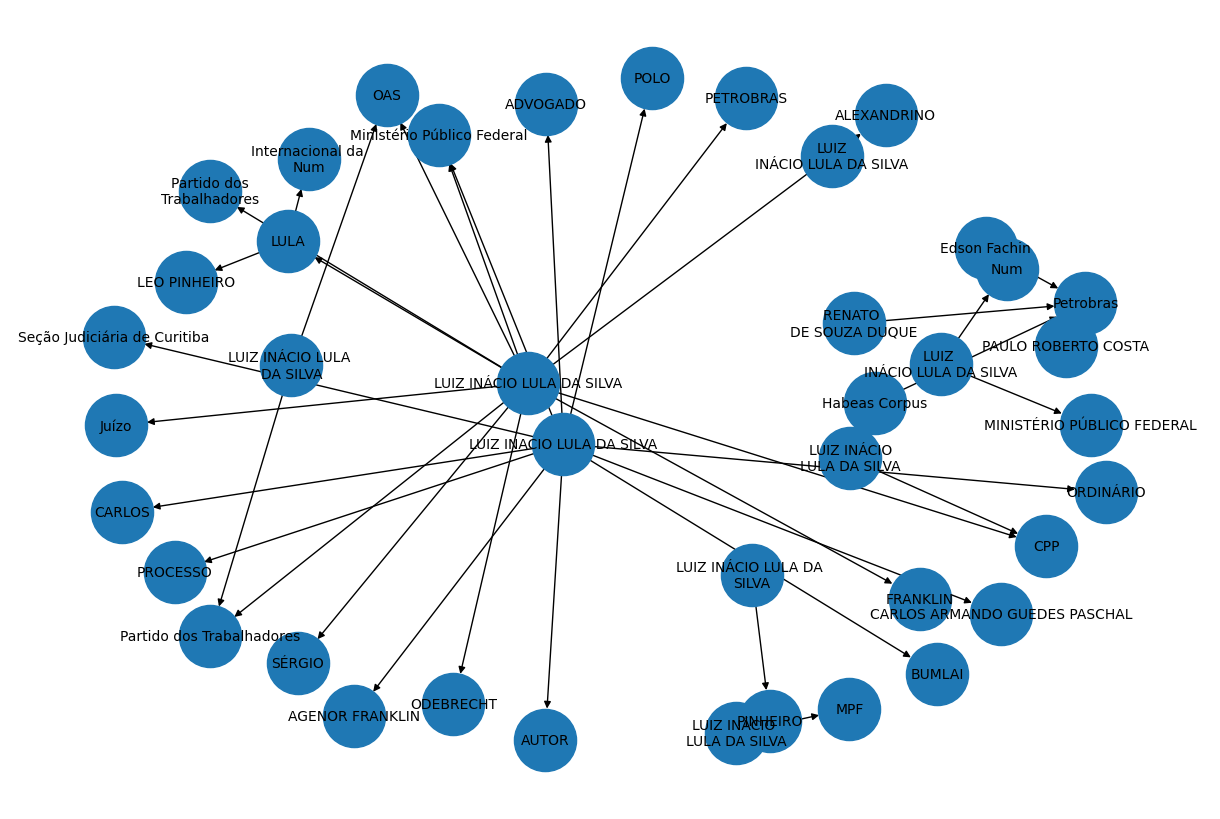

In [ ]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.4)  # layout mais bonitinho pra grafos pequenos
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10)

plt.show()